In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler






In [37]:
data = pd.read_csv('/home/hasan/DATA SET/heart-disease-uci/heart.csv')

In [38]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [39]:
data.shape

(303, 14)

# Feature Engineering

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [41]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


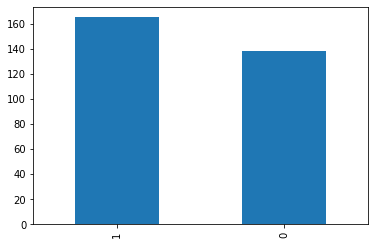

In [42]:
#Checking dataset is imbalance or balance
data['target'].value_counts().plot(kind='bar')

There are little difference of number between 0 and 1. So we can say dataset is balance

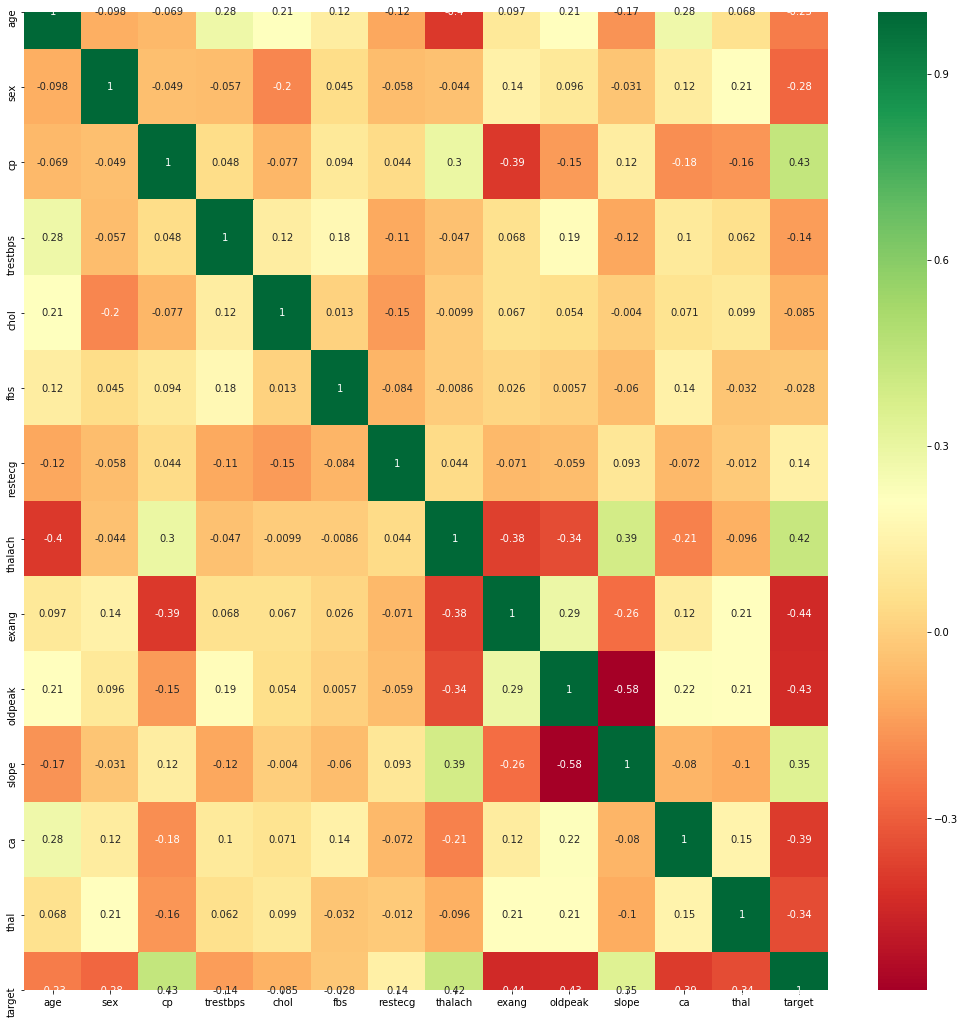

In [43]:
#finding correlation
cor_matrix = data.corr()

#correlated columns
most_cor_feature = cor_matrix.index

#correlated matrix in heatmap
plt.figure(figsize=(18,18))
sns.heatmap(data[most_cor_feature].corr(), annot=True, cmap='RdYlGn')

In [44]:
data = data[most_cor_feature]
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff5c2f7ee90>,
      dtype=object)

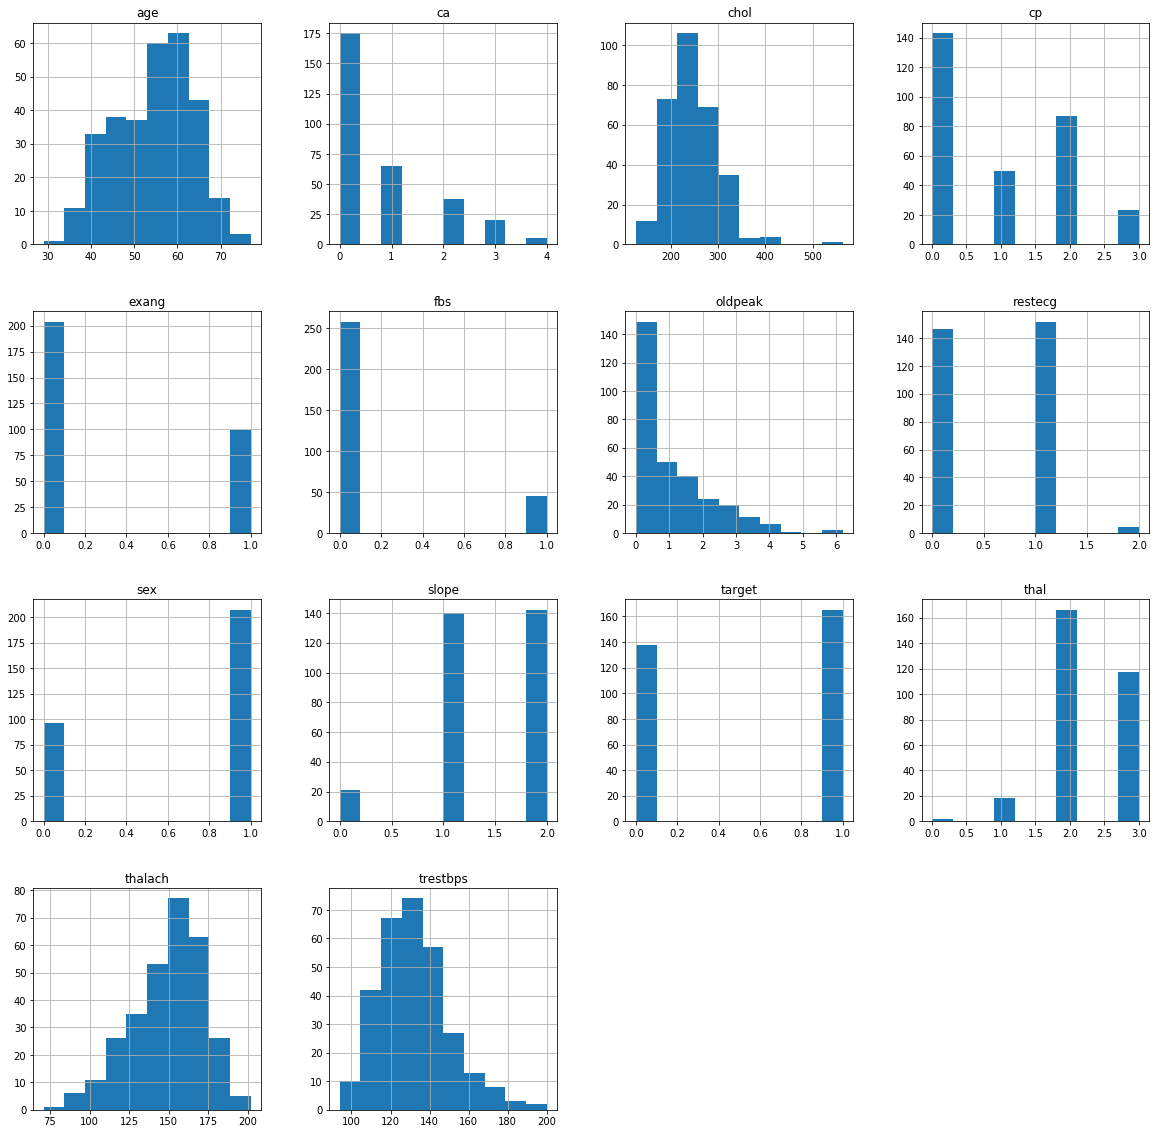

In [45]:
#Let's see the distribution of data
data.hist(figsize=(20,20))

# Data Preprocessing

In [46]:
#converting to dummy data
data = pd.get_dummies(data, columns=['sex','cp','fbs','restecg','exang','slope','ca','thal'])

#dummy data
data.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [49]:
columns_to_scale = ['age','trestbps','chol','thalach','oldpeak']

#Data Scaling
scaler = StandardScaler()
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale]) 

#After scaling data
data.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


# Dividing Dataset

In [51]:
#Independent Feature
X = data.drop(['target'], axis=1)

#dependent feature
y = data['target']

# Algorithm

In [56]:
scores = []

for k in range(1,21):
    algo = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(algo, X,y, cv=10)
    scores.append(score.mean())

scores

[0.7482684464219502,
 0.7652651093807934,
 0.8112940304041528,
 0.8046273637374861,
 0.8338820912124584,
 0.8307563959955505,
 0.8374378939562476,
 0.8410938079347423,
 0.8474378939562477,
 0.8474378939562477,
 0.8407638116425659,
 0.8506637004078605,
 0.8338820912124583,
 0.8337671486837227,
 0.8272080088987763,
 0.8372154245457917,
 0.8274304783092326,
 0.8209788654060068,
 0.8242046718576195,
 0.8243196143863551]

Text(0, 0.5, 'accuracy')

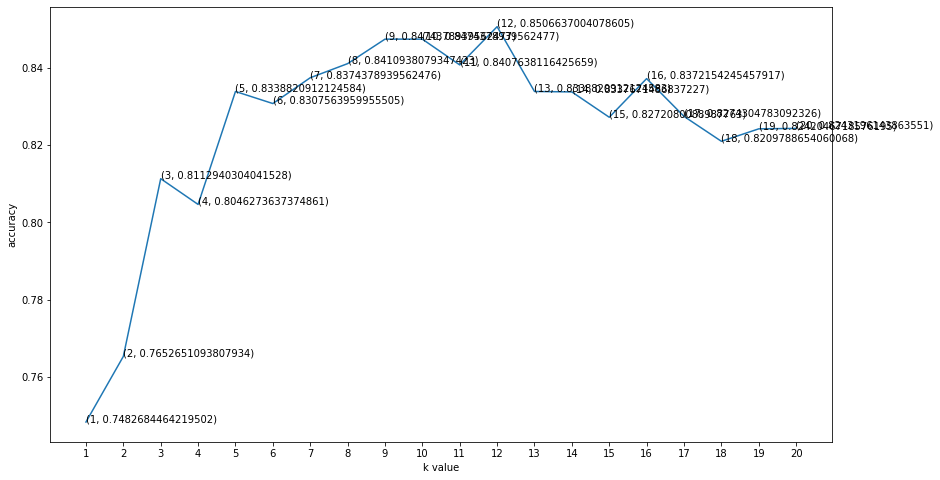

In [70]:
#plotting figure
plt.figure(figsize=(14,8))
plt.plot([k for k in range(1,21)], scores)

#printing text
for i in range(1,21):
    plt.text(i, scores[i-1], (i, scores[i-1]))
    
plt.xticks([k for k in range(1, 21)])
plt.xlabel('k value')
plt.ylabel('accuracy')


From the graph, it is clear that when k=12 model accuracy is high

In [74]:
#accuracy with k=12
knc = KNeighborsClassifier(n_neighbors=12)
score = cross_val_score(knc, X,y, cv=10)
score.mean()

0.8506637004078605

In [75]:
#declaring RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [77]:
cvs = cross_val_score(rfc, X,y, cv=10)
cvs

array([0.90322581, 0.80645161, 0.87096774, 0.90322581, 0.80645161,
       0.83333333, 0.76666667, 0.86666667, 0.75862069, 0.82758621])

In [78]:
cvs.mean()

0.8343196143863552

KNN algorithm provide good accuracy than RandomForestClassifier